### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
lojas = [loja, loja2, loja3, loja4]
faturamentos = [float(loja['Preço'].sum()) for loja in lojas]
cont = 0
for faturamento in faturamentos:
  cont += 1
  print(f'Faturamento da Loja {cont}: R$ {faturamento:,.2f}')


Faturamento da Loja 1: R$ 1,534,509.12
Faturamento da Loja 2: R$ 1,488,459.06
Faturamento da Loja 3: R$ 1,464,025.03
Faturamento da Loja 4: R$ 1,384,497.58


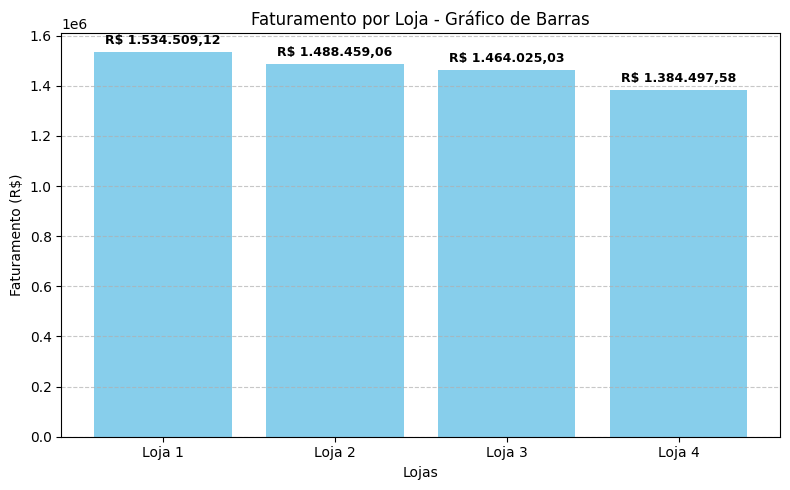

In [3]:
#Construindo o gráfico de barras com a analise do Faturamento por Loja

import matplotlib.pyplot as plt


lojasNome = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(8, 5))
barras = plt.bar(lojasNome, faturamentos, color='skyblue')
plt.title('Faturamento por Loja - Gráfico de Barras')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for barra, valor in zip(barras, faturamentos):
    plt.text(barra.get_x() + barra.get_width() / 2,
             barra.get_height() + 20000,
             f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
             ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [4]:
import pandas as pd

vendasPorCategoria = [l.groupby('Categoria do Produto').size().rename(n) for l, n in zip(lojas, lojasNome)]
vendasPorCategoria_df = pd.concat(vendasPorCategoria, axis=1)
print(vendasPorCategoria_df)

                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


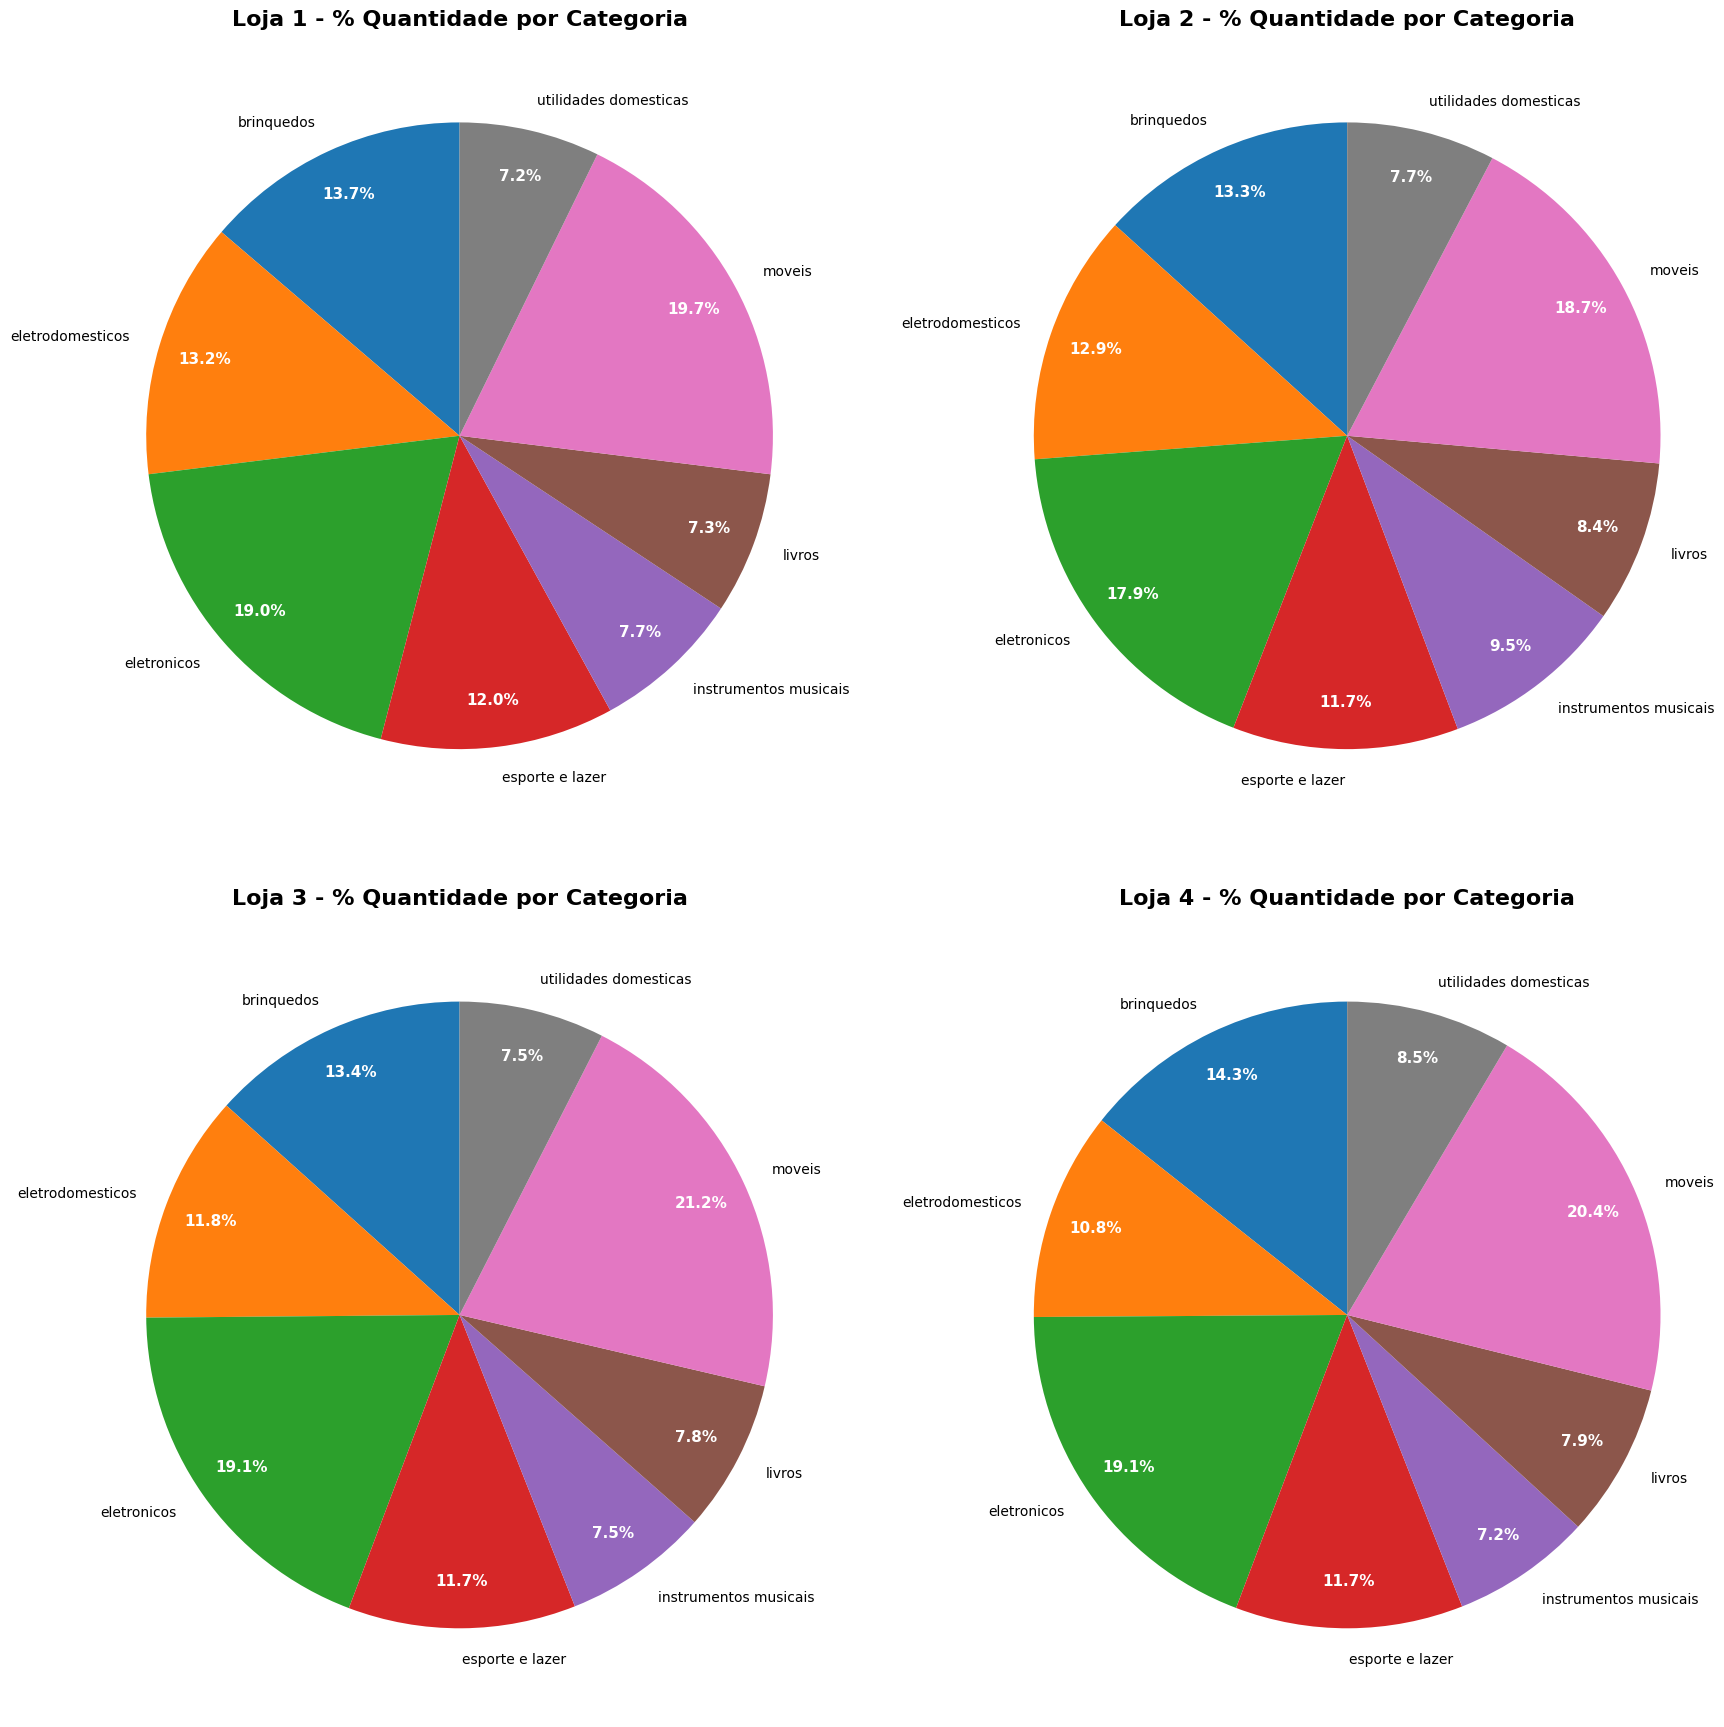

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(18, 18))
axes = axes.flatten()

for i, lojaNome in enumerate(lojasNome):
    ax = axes[i]

    dadosLoja = vendasPorCategoria_df[lojaNome]
    dadosLoja = dadosLoja.fillna(0)
    dadosLoja = dadosLoja[dadosLoja > 0]

    wedges, texts, autotexts = ax.pie(dadosLoja,
                                     labels=dadosLoja.index,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     pctdistance=0.85,
                                     textprops={'fontsize': 10}
                                    )

    plt.setp(autotexts, size=11, weight="bold", color="white")

    ax.set_title(f'{lojaNome} - % Quantidade por Categoria', fontsize=16, fontweight='bold')
    ax.axis('equal')

plt.tight_layout(pad=3.0)
plt.show()

# 3. Média de Avaliação das Lojas

In [6]:
mediasAvaliacao = [sum(loja['Avaliação da compra']) / len(loja['Avaliação da compra']) for loja in lojas]
cont = 1
for media in mediasAvaliacao:
  print(f'Média de Avaliação da Loja {cont}: {media:,.2f}')
  cont += 1

Média de Avaliação da Loja 1: 3.98
Média de Avaliação da Loja 2: 4.04
Média de Avaliação da Loja 3: 4.05
Média de Avaliação da Loja 4: 4.00


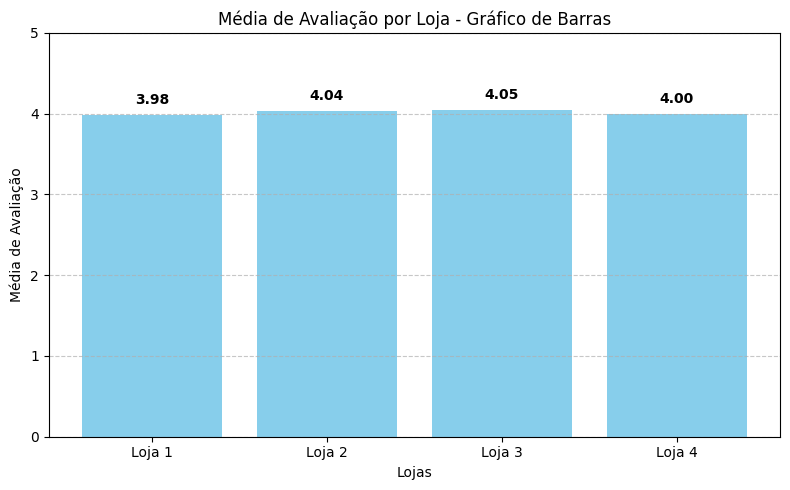

In [7]:
plt.figure(figsize=(8, 5))
barrasAvaliacao = plt.bar(lojasNome, mediasAvaliacao, color='skyblue')
plt.title('Média de Avaliação por Loja - Gráfico de Barras')
plt.ylabel('Média de Avaliação')
plt.xlabel('Lojas')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for barra, valor in zip(barrasAvaliacao, mediasAvaliacao):
    plt.text(barra.get_x() + barra.get_width() / 2,
             barra.get_height() + 0.1,
             f'{valor:,.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [12]:
for i, dfLoja in enumerate(lojas):
    lojaNome = lojasNome[i]
    contagemProdutosLoja = dfLoja['Produto'].value_counts()
    maisVendidos = contagemProdutosLoja.head(3)
    menosVendidos = contagemProdutosLoja.tail(3)

    print(f"\n----- Análise para {lojaNome} -----")
    print(f"\nTop 3 Produtos Mais Vendidos em {lojaNome}:")
    print(maisVendidos)
    print(f"\nTop 3 Produtos Menos Vendidos em {lojaNome}:")
    print(menosVendidos)


----- Análise para Loja 1 -----

Top 3 Produtos Mais Vendidos em Loja 1:
Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64

Top 3 Produtos Menos Vendidos em Loja 1:
Produto
Panela de pressão    35
Headset              33
Celular ABXY         33
Name: count, dtype: int64

----- Análise para Loja 2 -----

Top 3 Produtos Mais Vendidos em Loja 2:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Name: count, dtype: int64

Top 3 Produtos Menos Vendidos em Loja 2:
Produto
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64

----- Análise para Loja 3 -----

Top 3 Produtos Mais Vendidos em Loja 3:
Produto
Kit banquetas     57
Mesa de jantar    56
Cama king         56
Name: count, dtype: int64

Top 3 Produtos Menos Vendidos em Loja 3:
Produto
Mochila             36
Micro-ondas         36
Blocos de montar    35
Name: count, dtype: int64

----- Análise para

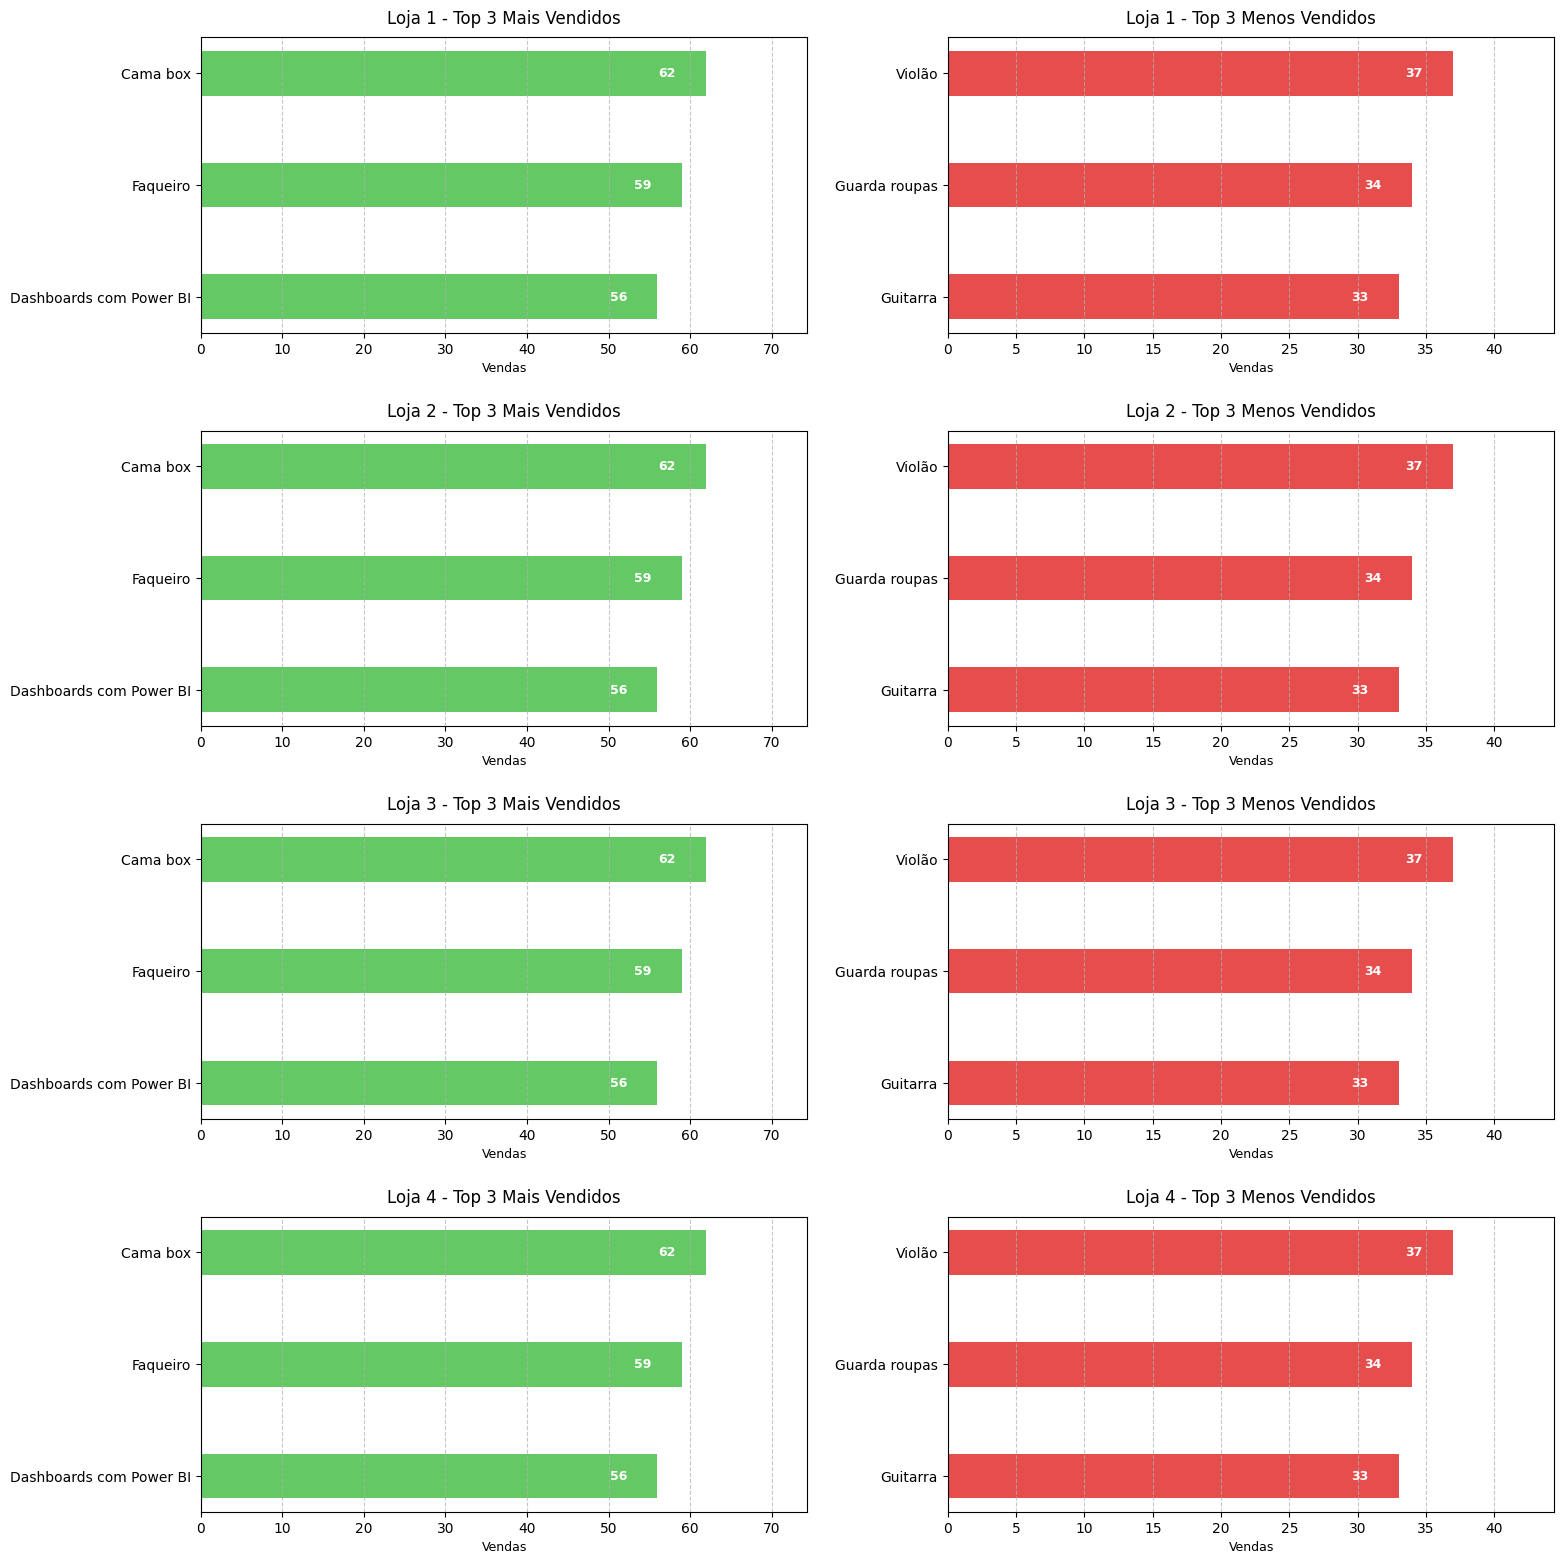

In [9]:
fig, axes = plt.subplots(len(lojasNome), 2, figsize=(16, 4 * len(lojasNome)))
axes = axes.flatten()

bar_height = 0.4
top_color = '#64C864'
bottom_color = '#E64D4D'

for i, dfLoja in enumerate(lojas):
    lojaNome = lojasNome[i]

    ax_top = axes[i * 2]
    bars_top = ax_top.barh(maisVendidos.index, maisVendidos.values,
                           height=bar_height, color=top_color)
    ax_top.set_title(f'{lojaNome} - Top 3 Mais Vendidos', fontsize=12, pad=10)
    ax_top.set_xlabel('Vendas', fontsize=9)
    ax_top.invert_yaxis()
    ax_top.grid(axis='x', linestyle='--', alpha=0.7)

    max_top_sales = maisVendidos.values.max() if not maisVendidos.empty else 0
    ax_top.set_xlim(0, max_top_sales * 1.2)

    for bar in bars_top:
        width = bar.get_width()

        text_x_position = max(0.5, width - (ax_top.get_xlim()[1] * 0.05))

        ax_top.text(text_x_position,
                    bar.get_y() + bar.get_height()/2,
                    f'{width:.0f}',
                    va='center',
                    ha='right',
                    fontsize=9,
                    color='white',
                    fontweight='bold')

    ax_bottom = axes[i * 2 + 1]
    bars_bottom = ax_bottom.barh(menosVendidos.index, menosVendidos.values,
                                 height=bar_height, color=bottom_color)
    ax_bottom.set_title(f'{lojaNome} - Top 3 Menos Vendidos', fontsize=12, pad=10)
    ax_bottom.set_xlabel('Vendas', fontsize=9)
    ax_bottom.invert_yaxis()
    ax_bottom.grid(axis='x', linestyle='--', alpha=0.7)

    max_bottom_sales = menosVendidos.values.max() if not menosVendidos.empty else 0
    ax_bottom.set_xlim(0, max_bottom_sales * 1.2)

    for bar in bars_bottom:
        width = bar.get_width()
        text_x_position = max(0.5, width - (ax_bottom.get_xlim()[1] * 0.05))

        ax_bottom.text(text_x_position,
                       bar.get_y() + bar.get_height()/2,
                       f'{width:.0f}',
                       va='center',
                       ha='right',
                       fontsize=9,
                       color='white',
                       fontweight='bold')

plt.tight_layout(pad=2.0)
plt.show()

# 5. Frete Médio por Loja


In [10]:
mediasFrete = [sum(loja['Frete']) / len(loja['Frete']) for loja in lojas]
cont = 1
for frete in mediasFrete:
  print(f'Média de Frete da Loja {cont}: R${frete:,.2f}')
  cont += 1

Média de Frete da Loja 1: R$34.69
Média de Frete da Loja 2: R$33.62
Média de Frete da Loja 3: R$33.07
Média de Frete da Loja 4: R$31.28


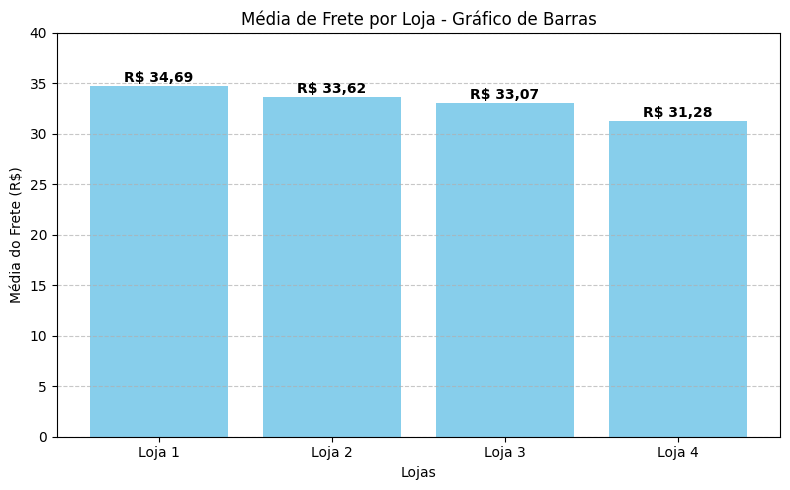

In [11]:
plt.figure(figsize=(8, 5))
barrasFrete = plt.bar(lojasNome, mediasFrete, color='skyblue')
plt.title('Média de Frete por Loja - Gráfico de Barras')
plt.ylabel('Média do Frete (R$)')
plt.xlabel('Lojas')
plt.ylim(0, 40)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for barra, valor in zip(barrasFrete, mediasFrete):
    plt.text(barra.get_x() + barra.get_width() / 2,
             barra.get_height() + 0.1,
             f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

# 6. Relatório
A **Loja 4**, apesar de ter alguns pontos positivos, é a **menos vantajosa** por diversos motivos:

### Faturamento 💸:
- A **Loja 4** tem o **menor faturamento** entre as lojas analisadas, com um total de **R$ 1.384.497,58**, o que indica um desempenho mais fraco em relação às outras lojas.

### Avaliação Média ⭐:
- A **Loja 4** tem uma **avaliação média de 4.00**, que é boa, mas não se destaca tanto quanto as outras lojas (a **Loja 3**, por exemplo, tem a avaliação mais alta com 4.05).

### Frete Médio 🚚:
- O custo de **frete médio** da **Loja 4** é o mais baixo, **R$ 31.28**, o que pode ser positivo em termos de custo-benefício. No entanto, esse valor não compensa as baixas vendas e o faturamento reduzido.

### Conclusão 🚫:
A **Loja 4** é a **menos vantajosa** devido ao **menor faturamento**, desempenho abaixo nas vendas totais, e a **avaliação média** que, embora boa, não é a melhor entre as lojas. Além disso, ela tem uma **menor receita de produtos**, o que pode indicar dificuldades em atrair consumidores para suas ofertas.

---

## Loja que o Sr. João deve se desfazer: **Loja 4** ❌

De acordo com a análise do desempenho das lojas, o Sr. João deve considerar a venda da **Loja 4**, pelos seguintes motivos:

### Faturamento e Desempenho Global 💸:
- A **Loja 4** tem o menor faturamento entre as lojas analisadas e não apresenta um desempenho suficiente para competir com as demais.

### Baixa Rentabilidade ⚠️:
- Apesar do custo de frete ser o mais baixo, o desempenho fraco nas vendas e o faturamento limitado fazem com que a loja seja uma opção menos rentável.

### Conclusão 🎯:
A **Loja 4** é a menos vantajosa para o Sr. João, que deve considerar se desfazer dela para focar em lojas com melhor performance.